## 1.项目背景
随着中国经济的快速发展，广州作为粤港澳大湾区核心城市之一，其房地产市场表现备受瞩目。购房者在面对复杂多样的房源信息时，常常感到困惑和无从下手。为帮助购房者更好地了解市场动态，做出科学的购房决策，本项目选取了广州市的房地产相关数据，旨在通过全面的数据分析和建模，找出影响房价的关键因素，并构建一个高效可靠的房价预测模型。项目将通过描述性分析、统计检验以及机器学习模型的开发与优化，深度挖掘数据价值，助力购房者在广州市繁杂的房地产市场中找到理想居所，同时为相关行业提供数据支持和决策依据。

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from scipy.stats import spearmanr
import statsmodels.api as sm
from statsmodels.formula.api import ols
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei'] #显示中文标签
plt.rcParams['axes.unicode_minus'] = False #显示负号
from IPython.core.interactiveshell import InteractiveShell
import warnings
# 忽略所有警告
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv('./gz_home_data1.csv')

In [3]:
data.head()

,标题,地区,位置,具体位置,resblock-tag1_resblock-tag_resblock-type_resblock-tag2_resblock-tag3,均价/平方米每元,总价,类型,室厅数,面积
0,越秀大学星汇锦城,番禺,南村,南村东线路越秀大学星汇锦城,"住宅,低单价,低总价,绿化率高,人车分流",30000,总价185-400(万/套),在售,"3室,4室",建面 70-126㎡
1,万科黄埔新城,黄埔,南岗,南岗街沙步大路2号,"住宅,优惠楼盘,低总价,车位充足,绿化率高",33000,总价235-500(万/套),在售,"3室,4室",建面 75-143㎡
2,中建未来方洲,黄埔,文冲,石化路中建未来方洲,"住宅,低总价,车位充足,绿化率高,国央企",42000,总价350(万/套),待售,NaN,NaN
3,合景誉山国际,增城,永宁,增城区新新大道合景誉山国际营销中心,"住宅,低单价,低总价,绿化率高,人车分流",10000,总价80(万/套),在售,3室,建面 74-142㎡
4,中旅名门府,花都,镜湖大道,G107中旅名门府,"住宅,低总价,车位充足,绿化率高,国央企",18500,总价150-250(万/套),在售,"2室,3室",建面 80-116㎡


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 10 columns):
 #   Column                                                                Non-Null Count  Dtype 
---  ------                                                                --------------  ----- 
 0   标题                                                                    720 non-null    object
 1   地区                                                                    720 non-null    object
 2   位置                                                                    718 non-null    object
 3   具体位置                                                                  720 non-null    object
 4   resblock-tag1_resblock-tag_resblock-type_resblock-tag2_resblock-tag3  720 non-null    object
 5   均价/平方米每元                                                              720 non-null    object
 6   总价                                                                    483 non-null    object
 7   类型      

In [5]:
data.sample(10)

,标题,地区,位置,具体位置,resblock-tag1_resblock-tag_resblock-type_resblock-tag2_resblock-tag3,均价/平方米每元,总价,类型,室厅数,面积
168,时代印记,黄埔,知识城,广东省广州市黄埔区亨美西路,"住宅,低单价,低总价,绿化率高,人车分流",18000,总价155-245(万/套),在售,"3室,4室",建面 87-136㎡
651,大华·紫悦府,番禺,市桥,禺山西路,"住宅,车位充足,绿化率高,品牌房企,健身跑道",27000,总价260(万/套),售罄,"2室,3室",建面 97-125㎡
427,保利阅江台,海珠,滨江东,广东省广州市海珠区玉菡路50号,"住宅,车位充足,人车分流,国央企,品牌房企",92000,总价1300-1900(万/套),在售,4室,建面 139-208㎡
134,星悦轩,白云,马务,黄石西顺兴路31-35号,"住宅,低总价,车位充足,人车分流,地铁沿线",32000,总价282-362(万/套),在售,3室,建面 74-110㎡
699,美的江上沄启,南沙,明珠湾,横沥镇晓风印月东三街1号,"底商,人车分流,封闭管理,品牌房企,公交直达",27000,总价100(万/套),售罄,NaN,NaN
345,招商保利海珠天珺,海珠,黄埔村,新港东路保利海珠天珺,"底商,车位充足,人车分流,国央企,品牌房企",50000,总价330(万/套),在售,NaN,NaN
28,荔富湖畔,增城,朱村,朱村街朱村大道东88号,"住宅,车位充足,绿化率高,品牌房企,入户花园",14000,总价142-235(万/套),在售,"3室,4室",建面 104-168㎡
75,万科海上传奇,荔湾,芳村,芳村大道珠江隧道口以西,"底商,车位充足,小型社区,国央企,品牌房企",价格待定,NaN,待售,NaN,NaN
433,旺村·知筑,黄埔,知识城,旺村西路旺村知筑,"住宅,小型社区,国央企,地铁沿线,公交直达",价格待定,NaN,待售,NaN,NaN
705,香江健康小镇三期一方小院,增城,派潭镇,达开北路香江健康小镇三期一方小院,"商业,小型社区,品牌房企,公交直达,超市",价格待定,NaN,售罄,NaN,NaN


In [6]:
data.rename(columns={'resblock-tag1_resblock-tag_resblock-type_resblock-tag2_resblock-tag3':'标签'},inplace=True)
data = data[['标题','地区','具体位置','类型','均价/平方米每元','室厅数','面积','标签','总价']]
data.head()

,标题,地区,具体位置,类型,均价/平方米每元,室厅数,面积,标签,总价
0,越秀大学星汇锦城,番禺,南村东线路越秀大学星汇锦城,在售,30000,"3室,4室",建面 70-126㎡,"住宅,低单价,低总价,绿化率高,人车分流",总价185-400(万/套)
1,万科黄埔新城,黄埔,南岗街沙步大路2号,在售,33000,"3室,4室",建面 75-143㎡,"住宅,优惠楼盘,低总价,车位充足,绿化率高",总价235-500(万/套)
2,中建未来方洲,黄埔,石化路中建未来方洲,待售,42000,NaN,NaN,"住宅,低总价,车位充足,绿化率高,国央企",总价350(万/套)
3,合景誉山国际,增城,增城区新新大道合景誉山国际营销中心,在售,10000,3室,建面 74-142㎡,"住宅,低单价,低总价,绿化率高,人车分流",总价80(万/套)
4,中旅名门府,花都,G107中旅名门府,在售,18500,"2室,3室",建面 80-116㎡,"住宅,低总价,车位充足,绿化率高,国央企",总价150-250(万/套)


In [7]:
data.isnull().sum()

标题            0
地区            0
具体位置          0
类型            0
均价/平方米每元      0
室厅数         289
面积          276
标签            0
总价          237
dtype: int64

In [8]:
# 查看数据中的字段大概内容
summary = {
    '标题':[data['标题'].nunique()],
    '类型':list(data['类型'].unique()),
    '具体位置':[data['具体位置'].nunique()],
    '地区':list(data['地区'].unique()),
    '室厅数':list(data['室厅数'].unique()),
}
df = pd.DataFrame.from_dict(summary,orient='index').T
df = df.fillna('')
df
# 删除其中的错误数据，此步骤可以忽略，这是由于作者数据集问题所造成的，在后面才发现，返回来修改
# print(data['类型'].unique())     # ['在售' '待售' '售罄']
index_to_drop = data.loc[data['类型']=='售罄'].index
data = data.drop(index_to_drop)


In [9]:
summary = {
    '标题':[data['标题'].nunique()],
    '类型':list(data['类型'].unique()),
    '具体位置':[data['具体位置'].nunique()],
    '地区':list(data['地区'].unique()),
    '室厅数':list(data['室厅数'].unique()),
}
df = pd.DataFrame.from_dict(summary,orient='index').T
df = df.fillna('')
df

,标题,类型,具体位置,地区,室厅数
0,518,在售,556,番禺,"3室,4室"
1,,待售,,黄埔,
2,,,,增城,3室
3,,,,花都,"2室,3室"
4,,,,南沙,1室
5,,,,天河,"4室,5室"
6,,,,从化,4室
7,,,,荔湾,"1室,3室"
8,,,,海珠,"1室,2室"
9,,,,白云,"3室,5室"


In [10]:
# 处理均价字段缺失值,以及异常字段
data['均价/平方米每元'] = data['均价/平方米每元'].replace('价格待定',0)
# 此步骤可以忽视，这是为了删除其中一个特殊的值，防止报错，方法一。
index_drop = data.loc[data['均价/平方米每元']=='112-175'].index
data.drop(data.loc[data['均价/平方米每元']=='800-1600'].index,inplace=True)
data.drop(index_drop,inplace=True)
# 方法二
# data['均价/平方米每元'] = data['均价/平方米每元'].astype(str)
# def delete(datas):
#     if '-' in datas:
#         data.drop(datas,inplace=True)
#     else:
#         pass
# data['均价/平方米每元'] = data['均价/平方米每元'].apply(delete)

# 使用中位数代替数据中的空值
data['均价/平方米每元'] = data['均价/平方米每元'].astype(float)
medians = data['均价/平方米每元'].median()
data['均价/平方米每元'] = data['均价/平方米每元'].replace(0,medians)


In [11]:
# 处理室厅数字段，由于数据量较少，所以选择填充数据，在这里选择使用众数填充
modes = data['室厅数'].mode()
data['室厅数'].fillna(modes[0],inplace=True)

In [12]:
# 处理室厅数字段，由于数据量较少，所以选择填充数据，在这里选择使用众数填充
modes = data['室厅数'].mode()
data['室厅数'].fillna(modes,inplace=True)
# 对于不确定的室厅数，计算平均值作为代表
def process_room(rooms):
    #strip() 是 Python 字符串的方法，会将上一步替换操作得到的字符串的首尾空白字符（包括空格、制表符 \t、换行符 \n 等）去除。
    rooms = rooms.replace('室','').strip()
    if ',' in rooms:
        #mins, maxs = map() 返回最大值和最小值
        #split()按照某一个字符分列，返回一个列表
        mins, maxs = map(float, rooms.split(','))
        return int((mins+maxs)/2)
    return int(rooms)
data['室厅数'] = data['室厅数'].apply(process_room)
data.sample(5)

,标题,地区,具体位置,类型,均价/平方米每元,室厅数,面积,标签,总价
156,尊悦台,南沙,广州市南沙区康宁路与荔湾路交叉路口往西约50米,在售,17500.0,2,建面 81-124㎡,"住宅,低单价,低总价,车位充足,人车分流",总价150-230(万/套)
264,碧桂园云樾江湾,增城,新城大道碧桂园云樾江湾,在售,21000.0,3,建面 88-137㎡,"住宅,车位充足,绿化率高,品牌房企,近地铁",总价180-295(万/套)
363,星河湾萝峰,黄埔,广东省广州市黄埔区萝岗路与启学路交叉口北200米,在售,38000.0,4,建面 130-265㎡,"住宅,车位充足,绿化率高,品牌房企,入户花园",总价480-1550(万/套)
234,华新方圆·333,海珠,海珠区工业大道中333号,在售,38000.0,1,建面 33-58㎡,"商业类,低总价,绿化率高,人车分流,品牌房企",总价130-205(万/套)
446,保利琅誉,番禺,广东省广州市番禺区傍雁路98号,在售,33000.0,3,建面 92-132㎡,"住宅,车位充足,绿化率高,国央企,品牌房企",总价315-470(万/套)


In [13]:
# 处理面积字段，并取中位数作为结果
data['面积'] = data['面积'].astype(str)

def process_area(area):
    area = area.replace('建面','').strip()
    area = area.replace('㎡','').strip()
    if '-' in area:
        area_min,area_max = map(float,area.split('-'))
        return ((area_min+area_max)/2)
    return float(area)
data['面积'] = data['面积'].apply(process_area)

area_average = data['面积'].median()
data['面积'].fillna(area_average,inplace=True)

data.sample(10)

,标题,地区,具体位置,类型,均价/平方米每元,室厅数,面积,标签,总价
304,联发|悦璞园,增城,南北大道联发悦璞,待售,18339.0,3,109.0,"住宅,小型社区,国央企,品牌房企,公交直达",NaN
44,凯德·中新里,黄埔,广州市黄埔区九龙大道地铁棠下站C口南向100米,在售,21000.0,2,108.0,"住宅,低单价,低总价,车位充足,绿化率高",总价145-355(万/套)
183,珠江时光荟,增城,广东省广州市增城区永宁街道创优路,在售,11200.0,3,81.0,"住宅,低单价,低总价,车位充足,人车分流",总价78-125(万/套)
471,高新仕林苑,黄埔,广州黄埔长岭居萝岭路以东、长贤路以南,在售,35000.0,3,140.5,"住宅,车位充足,绿化率高,国央企,品牌房企",总价360-490(万/套)
143,大壮国际广场,黄埔,开泰大道601号,待售,18339.0,3,109.0,"商业,大型社区,近地铁,地铁沿线,综合商场",NaN
252,金地景业格林水岸,增城,新新大道北金地景业格林水岸,待售,18339.0,3,109.0,"住宅,车位充足,人车分流,品牌房企,公交直达",NaN
616,珠江壹城·禧悦花园,从化,14号线神岗地铁站B出口,在售,28000.0,1,31.0,"商业,车位充足,人车分流,品牌房企,近地铁",总价62(万/套)
516,越秀·观樾,天河,黄村街道越秀观樾,在售,85000.0,4,195.0,"住宅,车位充足,绿化率高,国央企,置换改善",总价1100-2250(万/套)
365,旭辉曜玥湾,南沙,国际金融岛横沥大道旁,待售,18339.0,3,109.0,"商业类,车位充足,大型社区,品牌房企,地铁沿线",NaN
172,中国铁建海语熙岸,南沙,广州市南沙区美心路中国铁建海语熙岸,在售,30000.0,3,174.5,"住宅,车位充足,绿化率高,国央企,品牌房企",总价268-730(万/套)


In [14]:
# 处理总价字段，使用中位数作为最后的总价数
data['总价'] = data['总价'].astype(str)

def process_total(total):
    total = total.replace('总价','').strip()
    total = total.replace('(万/套)','').strip()
    if '-' in total:
        total_min, total_max = map(float, total.split('-'))
        return (total_min + total_max) / 2
    return float(total)
data['总价'] = data['总价'].apply(process_total)

# 使用中位数填充总价字段的缺失值
total_median = data['总价'].median()
data['总价'].fillna(total_median,inplace=True)
data.sample(10)

,标题,地区,具体位置,类型,均价/平方米每元,室厅数,面积,标签,总价
18,霍英东集团·南天名苑,番禺,洛浦街洛溪环岛北路8号,在售,90000.0,4,310.0,"住宅,车位充足,低密居所,国央企,置换改善",3710.0
102,汇金国际金融中心,天河,黄埔大道中660号,在售,50000.0,3,109.0,"写字楼,车位充足,人车分流,国央企,品牌房企",405.0
306,广州城投·空港1号,花都,广州市花都区雅新大道（黄广中学南侧）,在售,23000.0,3,95.5,"住宅,车位充足,绿化率高,国央企,品牌房企",230.0
241,耀胜新世界广场·耀胜尊府,番禺,汉兴西路耀胜新世界广场,在售,65000.0,3,104.5,"住宅,车位充足,人车分流,品牌房企,近地铁",655.0
395,中建天河精诚壹号,天河,广东省广州市天河区长兴街道华观路以北，高唐路以西,在售,60000.0,2,98.0,"住宅,绿化率高,人车分流,国央企,品牌房企",622.5
296,广州滨江上都,荔湾,芳村大道南广州滨江上都,在售,70000.0,2,230.0,"商业类,车位充足,绿化率高,品牌房企,多轨交汇",565.0
485,天鹅壹号,海珠,环岛路天鹅壹号,待售,18339.0,3,109.0,"商业类,小型社区,近地铁,多轨交汇,超市",337.5
342,珠实云悦花语,白云,广州市白云区钟落潭镇良城三路7号距广州14号线钟落潭地铁站A出口800米处,在售,15000.0,3,84.0,"住宅,低单价,低总价,车位充足,绿化率高",145.0
447,路劲美的隽樾府,番禺,广东省广州市番禺区东盛路50号,在售,38000.0,2,109.5,"住宅,低总价,车位充足,人车分流,品牌房企",415.0
260,广州城投领南府,番禺,石洲中路广州城投领南府,在售,38000.0,2,120.5,"住宅,低总价,车位充足,绿化率高,国央企",475.0


## 4.描述性分析

In [15]:
data.describe()

,均价/平方米每元,室厅数,面积,总价
count,616.000000,616.000000,616.000000,616.000000
mean,30569.951299,2.823052,121.432630,503.984659
std,22760.548859,0.754081,105.744238,681.353294
min,110.000000,0.000000,22.500000,31.500000
25%,18339.000000,3.000000,103.500000,245.000000
50%,18419.500000,3.000000,109.000000,337.500000
75%,37000.000000,3.000000,115.000000,447.875000
max,150000.000000,6.000000,2439.000000,8000.000000


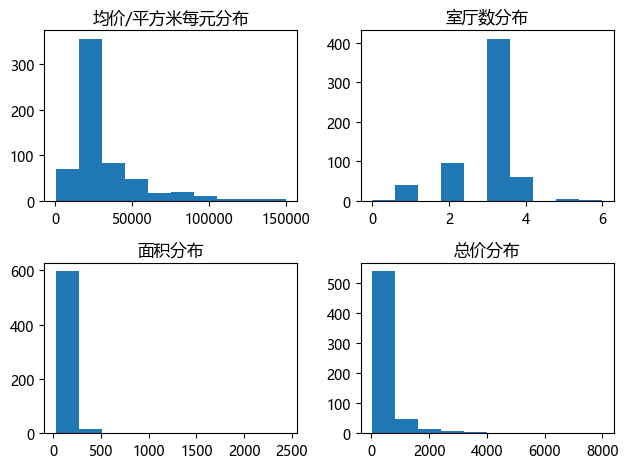

In [16]:
features = ['均价/平方米每元','室厅数','面积','总价']
for i,datas in enumerate(features,1):
    plt.subplot(2,2,i)
    plt.hist(data[datas])
    plt.title(f'{datas}分布')

plt.tight_layout()
plt.show()

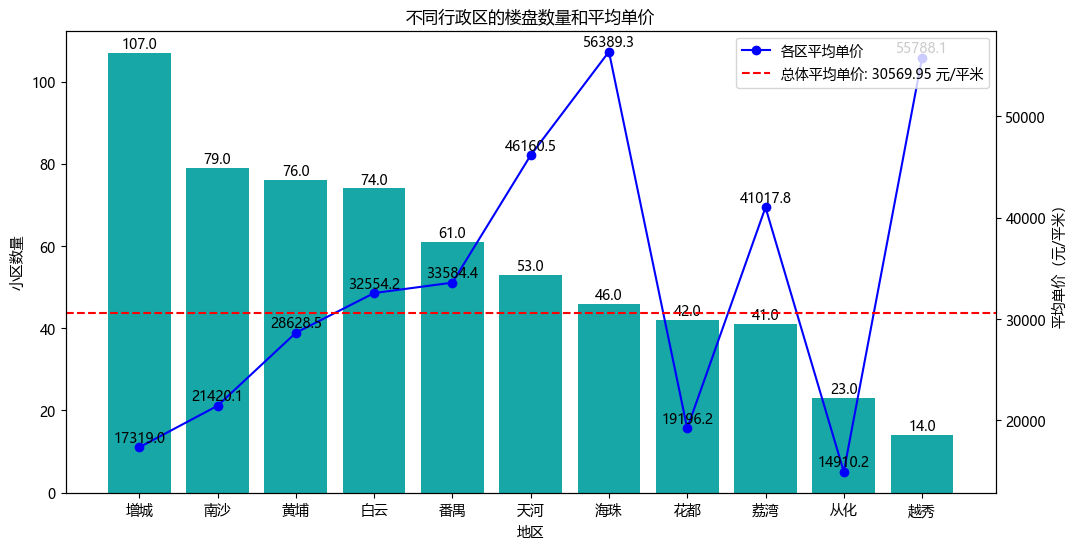

In [17]:
# 计算各地区的小区数量，并按降序排列
region_order = data['地区'].value_counts().sort_values(ascending=False).index

# 计算各行政区的平均单价，按新的顺序对平均单价排序
average_pricel = data.groupby('地区')['均价/平方米每元'].mean()
#reindex()按照region_order的index顺序重新排序
average_pricel = average_pricel.reindex(region_order)
#print(average_pricel)
# 计算总体平均单价
overall_average_price = data['均价/平方米每元'].mean()
# 按降序排列绘制小区数量的柱状图
fig, ax1 = plt.subplots(figsize=(12, 6))
sns.countplot(data=data,x='地区',order=region_order,ax=ax1,color='c')
ax1.set_xlabel('地区')
ax1.set_ylabel('小区数量')
ax1.tick_params(axis='x',rotation=0)
for p in ax1.patches:
    height = p.get_height()
    ax1.text(p.get_x() + p.get_width() / 2., height + 0.1,  # 计算文本的 x 和 y 位置
            height, ha="center", va="bottom")  # 水平和垂直对齐方式

# 创建第二个坐标轴，用于绘制各个行政区的单价折线图
ax2 = ax1.twinx()
ax2.plot(average_pricel.index, average_pricel.values, color='b', marker='o', linestyle='-',label='各区平均单价')
ax2.set_ylabel('平均单价（元/平米）')
ax2.legend(loc='upper right')
# 为 ax2 的折线图添加数值标签
for x, y in zip(average_pricel.index, average_pricel.values):
    ax2.text(x, y + 100, f'{y:.1f}', ha='center', va='bottom')  # 在数据点上方添加数值标签，偏移量为 100

# 标出总体平均单价
line = ax2.axhline(overall_average_price, color='r', linestyle='--', label=f'总体平均单价: {overall_average_price:.2f} 元/平米')
# 在参考线旁边添加文本标签
#ax2.text(0.02, overall_average_price, f'总体平均单价: {overall_average_price:.2f} 元/平米', transform=ax2.get_yaxis_transform(), 
         #color='r', va='center', ha='left')
# 显示图例
ax2.legend(loc='upper right')
#ax2.legend([line],[f'avg_count={overall_average_price:.2f}'])
plt.title('不同行政区的楼盘数量和平均单价')
plt.show()

Counter({'住宅': 351, '品牌房企': 339, '人车分流': 313, '车位充足': 308, '国央企': 260, '绿化率高': 202, '低总价': 153, '小型社区': 145, '近地铁': 122, '商业类': 111, '地铁沿线': 107, '低单价': 95, '大型社区': 90, '商业': 79, '公交直达': 59, '写字楼': 48, '超市': 34, '底商': 25, '综合商场': 25, '置换改善': 24, '封闭管理': 22, '入户花园': 21, '多轨交汇': 20, '低密居所': 18, '健身跑道': 12, '贴心物业': 11, '儿童乐园': 9, '自持商业': 8, '养老舒适': 6, '高品质小区': 6, '休闲会所': 6, '小户型': 5, '水系园林': 4, '大平层': 4, '优惠楼盘': 3, '现房': 3, '特价好房': 3, '公园': 3, '已交房2年内': 2, '私属庭院': 2, '酒店式公寓': 2, '绿色建筑': 2, '避暑': 1, '中式建筑': 1, '临近高速': 1, '大三居': 1, '近主干道': 1, '开发区': 1, 'loft': 1, '小三居': 1, '动静分明': 1, '视频看房': 1, '已交房1年内': 1})


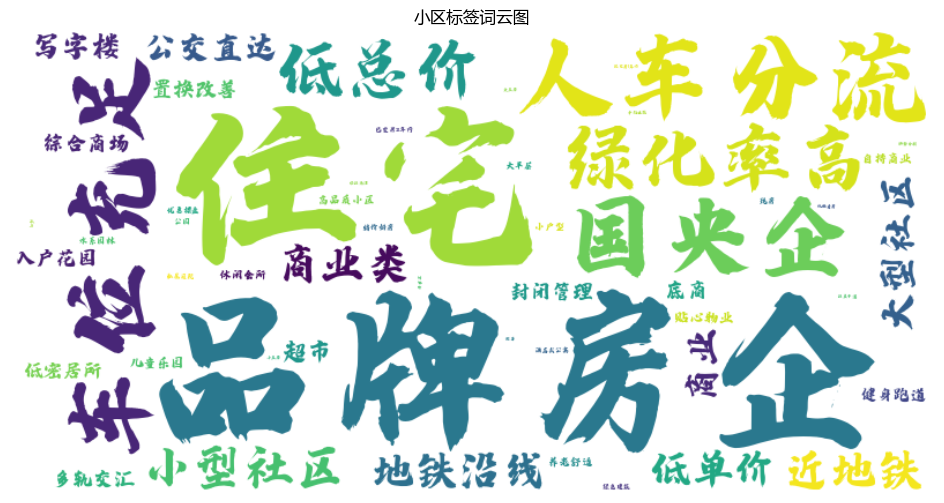

In [18]:
# 提取小区标签并统计出现次数
#explode() 方法将列表中的元素展开，将一个包含列表的列转换为多个行，每个元素占据一行。
tags = data['标签'].str.split(',').explode()
#Counter(tags) 的主要作用是对 tags 中的元素进行计数统计，它会创建一个字典，其中键是 tags 中的元素，值是该元素在 tags 中出现的次数。
tag_counts = Counter(tags)
print(tag_counts)
# 生成词云图,在本地运行时候font_path替换成本地字体
wordcloud = WordCloud(font_path='./字魂白鸽天行体(商用需授权).ttf',background_color='white', width=800, height=400).generate_from_frequencies(tag_counts)
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('小区标签词云图')
plt.show()

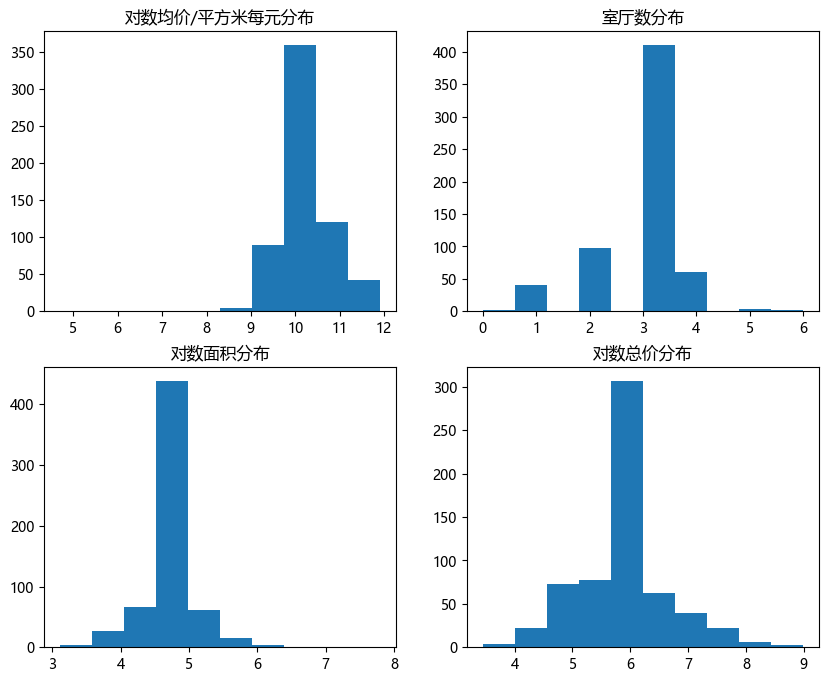

In [19]:
# 通过以上的描述分析可知【均价，总价，面积】呈现偏态分布
# 进行对数变换
#np.log(),取自然对数
data['对数均价/平方米每元'] = np.log(data['均价/平方米每元'])
data['对数总价'] = np.log(data['总价'])
data['对数面积'] = np.log(data['面积'])

plt.figure(figsize=(10,8))
list_log = ['对数均价/平方米每元','室厅数','对数面积','对数总价']
for i,col in enumerate(list_log,1):
    plt.subplot(2,2,i)
    plt.hist(data[col])
    plt.title(f'{col}分布')
plt.show()

In [40]:
df = data.copy()
# 2. 查看标签字段的分布
标签_series = df['标签'].str.split(',')  # 如果每行只有一个标签，可以忽略这一步
标签_counts = Counter(tag.strip() for tags in 标签_series for tag in tags)
'''
tag.strip() for tags in biaoqian_series for tag in tags
上面这个循环等于下面这个！！
for tags in biaoqian_series:
    for tag in tags:
        tag.strip()
'''
标签_counts = pd.Series(标签_counts).sort_values(ascending=False)
# 3. 筛选出现次数大于200的标签
频繁标签 = 标签_counts[标签_counts > 90].index.tolist()
print('频繁标签',频繁标签)

# 4. 创建新的二进制字段
df['标签列表'] = df['标签'].str.split(',')
#去除按照","分列之后，去除每个元素去的开头和结尾的空白字符。空白字符包括空格 、制表符 \t、换行符 \n、回车符 \r 和换页符 \f 等。
df['标签列表'] = df['标签列表'].apply(lambda tags: [tag.strip() for tag in tags])

for 标签 in 频繁标签:
    df[f'是否是{标签}'] = df['标签列表'].apply(lambda tags: 1 if 标签 in tags else 0)
# 5. 删除临时列
df = df.drop(columns=['标签列表'])

df.sample(2)

频繁标签 ['住宅', '品牌房企', '人车分流', '车位充足', '国央企', '绿化率高', '低总价', '小型社区', '近地铁', '商业类', '地铁沿线', '低单价']


,标题,地区,具体位置,类型,均价/平方米每元,室厅数,面积,标签,总价,对数均价/平方米每元,...,是否是人车分流,是否是车位充足,是否是国央企,是否是绿化率高,是否是低总价,是否是小型社区,是否是近地铁,是否是商业类,是否是地铁沿线,是否是低单价
75,万科海上传奇,荔湾,芳村大道珠江隧道口以西,待售,18339.0,3,109.0,"底商,车位充足,小型社区,国央企,品牌房企",337.5,9.816785,...,0,1,1,0,0,1,0,0,0,0
236,保利南方财经大厦,天河,天河国际金融城金融方城（近临江大道）,在售,42000.0,6,353.0,"写字楼,人车分流,封闭管理,国央企,品牌房企",1600.0,10.645425,...,1,0,1,0,0,0,0,0,0,0


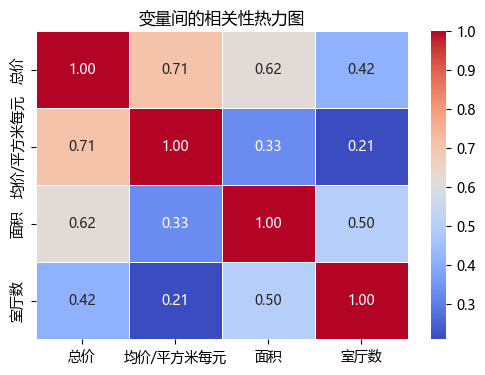

In [41]:
new_df = df[['总价','均价/平方米每元','面积','室厅数']]
corr_df = new_df.corr(method='spearman')

# 设置热力图的尺寸
plt.figure(figsize=(6, 4))

# 使用seaborn的heatmap绘制相关性矩阵
sns.heatmap(corr_df, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# 设置标题
plt.title("变量间的相关性热力图")
plt.show()

In [51]:
contingency_table_test = pd.crosstab(df['是否是人车分流'], df['对数均价/平方米每元'])
contingency_table_test

对数均价/平方米每元,4.700480,8.517193,8.968269,8.973098,8.987197,9.047821,9.082507,9.104980,9.159047,9.190138,...,11.350407,11.407565,11.429544,11.461632,11.512925,11.608236,11.775290,11.820410,11.849398,11.918391
是否是人车分流,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,1,0,1,1,1,0,...,4,6,0,0,2,0,1,1,0,1
1,1,1,1,0,0,1,0,2,1,1,...,3,0,1,2,5,4,2,0,1,0


In [47]:
column_titles = df.columns[-10:].tolist()

from scipy.stats import chi2_contingency
'''
从 scipy.stats 模块中导入 chi2_contingency 函数，该函数用于计算卡方检验统计量、p 值、自由度和期望频率，通常用于检验两个分类变量之间是否存在关联。
'''
'''
contingency_table = pd.crosstab(df[i], df['对数均价/平方米每元'])：
    pd.crosstab() 是 pandas 的函数，用于创建交叉表（列联表）。
    df[i] 表示 df 中列名为 i 的列。
    df['对数均价/平方米每元'] 表示 df 中名为 对数均价/平方米每元 的列。
    该语句创建了一个以 df[i] 为行，df['对数均价/平方米每元'] 为列的交叉表，存储在 contingency_table 中。
    
chi2, p, dof, expected = chi2_contingency(contingency_table)：
    调用 chi2_contingency 函数对 contingency_table 进行卡方检验。
    chi2 是卡方统计量，它反映了观察值与期望值的偏离程度。
    p 是 p 值，用于检验假设是否显著，如果 p < 0.05，通常认为结果是显著的。
    dof 是自由度，是在计算统计量时可以自由变化的值的数量。
    expected 是期望频率表，是在原假设下的期望频率。
'''
for i in column_titles:
    contingency_table = pd.crosstab(df[i], df['对数均价/平方米每元'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        print(f"{i}p值: {p}")

是否是人车分流p值: 0.001740679357827793
是否是车位充足p值: 0.00015873582007822838
是否是国央企p值: 0.009167416023782234
是否是绿化率高p值: 1.5488668463792732e-09
是否是低总价p值: 1.594510810898519e-17
是否是小型社区p值: 3.9319286453001613e-13
是否是近地铁p值: 0.004703134075394769
是否是地铁沿线p值: 0.005830420396246581
是否是低单价p值: 6.88621992272664e-31


In [49]:
for i in column_titles:
    contingency_table = pd.crosstab(df[i], df['对数总价'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    if p < 0.05:
        print(f"{i}p值: {p}")

是否是车位充足p值: 0.04410401036665289
是否是绿化率高p值: 2.4384510027943624e-09
是否是低总价p值: 2.0103218662656857e-10
是否是低单价p值: 4.11721121656354e-10


In [54]:
data = df.copy()
pd.set_option('display.max_columns', None)
data.sample()

,标题,地区,具体位置,类型,均价/平方米每元,室厅数,面积,标签,总价,对数均价/平方米每元,对数总价,对数面积,是否是住宅,是否是品牌房企,是否是人车分流,是否是车位充足,是否是国央企,是否是绿化率高,是否是低总价,是否是小型社区,是否是近地铁,是否是商业类,是否是地铁沿线,是否是低单价
391,智联花园,番禺,石楼镇智睿大街4号,在售,30000.0,3,109.0,"底商,车位充足,人车分流,国央企,品牌房企",3000.0,10.308953,8.006368,4.691348,0,1,1,1,1,0,0,0,0,0,0,0


## 5.建立模型——线性回归模型

In [56]:
# 首先分析总价
# 设置自变量与因变量
X = data[['对数均价/平方米每元','对数面积','室厅数','是否是住宅','是否是车位充足','是否是绿化率高','是否是低总价','是否是低单价']]
y = data['对数总价']
'''
X = sm.add_constant(X)：
    sm.add_constant(X) 是 statsmodels.api 中的函数，它为 X 数据框添加一个常数项列（通常用于线性回归中的截距项）。
    这是线性回归模型的标准操作，因为一般的线性回归方程是y=b0+b1x1+b2x2+......+bnxn ，其中b0是截距，添加常数项列是为了估计截距。
'''
X = sm.add_constant(X)
'''
model = sm.OLS(y,X)：

    sm.OLS 是 statsmodels.api 中的普通最小二乘（Ordinary Least Squares）回归模型类。
    它将 y 作为因变量，X 作为自变量，创建一个线性回归模型对象 model。

result = model.fit()：

    model.fit() 方法用于拟合线性回归模型，它会计算模型的参数，如回归系数、标准误差、t 值、p 值等。
    拟合过程会最小化残差平方和，找到最佳的回归系数，使预测值和实际值之间的误差平方和最小。

print(result.summary())：

    result.summary() 会生成一个回归结果的摘要，包含以下信息：
        模型的描述信息，如模型类型、数据点数、变量数等。
        回归系数的估计值、标准误差、t 值、p 值，用于评估每个自变量的显著性。
        模型的拟合优度指标，如 R-squared、Adjusted R-squared 等，用于评估模型对数据的拟合程度。
        一些统计检验的结果，如 F 统计量、AIC、BIC 等，用于评估模型的整体显著性和模型的简洁性。

'''
model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   对数总价   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     259.8
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          2.23e-190
Time:                        19:10:05   Log-Likelihood:                -260.10
No. Observations:                 616   AIC:                             538.2
Df Residuals:                     607   BIC:                             578.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -5.4211      0.326    -16.651      0.000      -6.060      -4.782
对数均价/平方米每元     0.6308      0.029     21.704      0.000       0.574       0.688
对数面积           1.0220      0.049     20.840      0.000       0.926       1.118
室厅数            0.0634      0.023      2.748      0.006       0.018       0.109
是否是住宅         -0.0181      0.037     -0.493      0.622      -0.090       0.054
是否是车位充足       -0.0250      0.032     -0.783      0.434      -0.088       0.038
是否是绿化率高       -0.0239      0.037     -0.650      0.516      -0.096       0.048
是否是低总价        -0.2192      0.048     -4.586      0.000      -0.313      -0.125
是否是低单价        -0.1436      0.059     -2.416      0.016      -0.260      -0.027
==============================================================================
Omnibus:                      428.260   Durbin-Watson:                   2.064
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            18360.953
Skew:                           2.510   Prob(JB):                         0.00
Kurtosis:                      29.271   Cond. No.                         254.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

1. 模型整体信息部分：

    Dep. Variable：因变量的名称，即你要预测或解释的变量，在你之前的代码中是 y。
    Model：所使用的模型类型，这里是 OLS（普通最小二乘）。
    Method：估计方法，对于 OLS 通常是 Least Squares（最小二乘法），即最小化残差平方和来估计模型参数。
    No. Observations：观察值的数量，也就是样本的数量，即数据点的数量。
    Df Residuals：残差的自由度，计算方式为 样本数量 - 自变量数量 - 1。
    Df Model：模型的自由度，即自变量的数量。
    Covariance Type：协方差矩阵的类型，通常为 nonrobust，表示使用标准的协方差矩阵估计。


2. 回归系数部分：

    coef：回归系数的估计值。对于线性回归方程 

，这里列出了

    的估计值。
    std err：回归系数的标准误差，用于衡量估计的精度，较小的标准误差表示估计更精确。
    t：t 统计量，计算方式为 coef / std err，用于检验系数是否显著不为零。
    P>|t|：p 值，基于 t 统计量的概率值，用于假设检验。如果 p < 0.05，通常认为相应的自变量在 95% 的置信水平下显著，即该自变量对因变量有显著影响。
    [0.025 0.975]：置信区间，通常是 95% 的置信区间，表示真实的回归系数有 95% 的可能性落在这个区间内。


3. 模型评估部分：

    R-squared：决定系数，取值范围在 0 到 1 之间，它表示模型解释因变量方差的比例，越接近 1 表示模型拟合得越好。
    Adj. R-squared：调整后的决定系数，考虑了自变量的数量，对 R-squared 进行了调整，用于比较不同自变量数量的模型。
    F-statistic：F 统计量，用于检验整个模型的显著性，即所有自变量是否联合起来对因变量有显著影响。
    Prob (F-statistic)：F 统计量对应的 p 值，用于判断模型整体是否显著，一般 p < 0.05 表示模型整体显著。


4. 其他信息部分：

    Log-Likelihood：对数似然值，用于模型比较，在最大似然估计中很重要。
    AIC（Akaike Information Criterion）和 BIC（Bayesian Information Criterion）：用于模型选择，值越小表示模型越好，在比较不同模型时很有用，它们都考虑了模型的复杂度和拟合优度，BIC 对模型复杂度的惩罚更强。


In [57]:
# 分析均价
# 设置自变量与因变量
X = data[['对数总价','对数面积','室厅数','是否是品牌房企', '是否是住宅', '是否是人车分流', '是否是车位充足', '是否是国央企', 
            '是否是绿化率高', '是否是小型社区', '是否是低总价', '是否是近地铁', '是否是地铁沿线','是否是低单价']]
y = data['对数均价/平方米每元']
X = sm.add_constant(X)

model = sm.OLS(y,X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             对数均价/平方米每元   R-squared:                       0.625
Model:                            OLS   Adj. R-squared:                  0.616
Method:                 Least Squares   F-statistic:                     71.54
Date:                Wed, 22 Jan 2025   Prob (F-statistic):          6.66e-118
Time:                        19:11:53   Log-Likelihood:                -272.24
No. Observations:                 616   AIC:                             574.5
Df Residuals:                     601   BIC:                             640.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4303      0.239     35.321      0.000       7.962       8.899
对数总价           0.6834      0.032     21.667      0.000       0.621       0.745
对数面积          -0.5172      0.063     -8.163      0.000      -0.642      -0.393
室厅数           -0.0262      0.024     -1.087      0.278      -0.074       0.021
是否是品牌房企        0.0411      0.041      0.991      0.322      -0.040       0.122
是否是住宅          0.1221      0.038      3.203      0.001       0.047       0.197
是否是人车分流        0.1018      0.040      2.527      0.012       0.023       0.181
是否是车位充足        0.0498      0.038      1.310      0.191      -0.025       0.124
是否是国央企         0.0241      0.039      0.624      0.533      -0.052       0.100
是否是绿化率高        0.1641      0.045      3.667      0.000       0.076       0.252
是否是小型社区       -0.0581      0.051     -1.133      0.257      -0.159       0.043
是否是低总价         0.2329      0.056      4.196      0.000       0.124       0.342
是否是近地铁         0.0082      0.045      0.183      0.855      -0.080       0.096
是否是地铁沿线       -0.1017      0.051     -2.002      0.046      -0.202      -0.002
是否是低单价        -0.3338      0.064     -5.249      0.000      -0.459      -0.209
==============================================================================
Omnibus:                      738.950   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           158304.889
Skew:                          -5.451   Prob(JB):                         0.00
Kurtosis:                      80.775   Cond. No.                         132.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 6.人工神经网络

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.metrics import MeanSquaredError

In [61]:
# 2. 数据预处理
X = data[['对数均价/平方米每元','对数面积','室厅数','是否是住宅','是否是车位充足','是否是绿化率高','是否是低总价','是否是低单价']].values
y = data['对数总价'].values
# 特征缩放
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 3. 构建人工神经网络
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # 输出层
])

model.compile(optimizer='adam', loss='mse', metrics=[MeanSquaredError()])
# 4. 训练模型
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, verbose=1)

# # 5. 测试模型
# test_loss, test_mae = model.evaluate(X_test, y_test, verbose=0)
# print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")

# 5. 评估模型并计算 R²
y_pred = model.predict(X_test).flatten()

# R² 计算
ss_res = np.sum((y_test - y_pred) ** 2)
ss_tot = np.sum((y_test - np.mean(y_test)) ** 2)
r2_score = 1 - (ss_res / ss_tot)

print(f"R²: {r2_score:.4f}")

# 6. 使用模型进行预测
predictions = model.predict(X_test[:9])
print(f"真实值: {y_test[:9]}")
print(f"预测值: {predictions.flatten()}")


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 32.4516 - mean_squared_error: 32.4516 - val_loss: 29.7375 - val_mean_squared_error: 29.7375
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 27.7783 - mean_squared_error: 27.7783 - val_loss: 25.5740 - val_mean_squared_error: 25.5740
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.9647 - mean_squared_error: 23.9647 - val_loss: 20.9655 - val_mean_squared_error: 20.9655
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 18.9850 - mean_squared_error: 18.9850 - val_loss: 15.5651 - val_mean_squared_error: 15.5651
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 13.6585 - mean_squared_error: 13.6585 - val_loss: 9.7968 - val_mean_squared_error: 9.7968
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 8.2501 - mean_squared_error: 8.2501 - val_loss: 4.8926 - val_mean_squared_error: 4.8926
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 3.9975 - mean_squared_error: 3.9975 - va

## 7.随机森林模型

In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,accuracy_score

### 1.总价预测

In [63]:
# 设定自变量与因变量，并划分训练集与测试集
# 首先分析总价
X = data[['对数均价/平方米每元','对数面积','室厅数','是否是住宅','是否是车位充足','是否是绿化率高','是否是低总价','是否是低单价']]
Y = data['对数总价']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# 训练模型
models = RandomForestRegressor(n_estimators=50,random_state=42)
models.fit(X_train,Y_train)

# 预测测试集结果
y_pred = models.predict(X_test)

# 计算准确率
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

print('mae:',mae)
print('mse:',mse)
print('r2:',r2)

mae: 0.19303990757302708
mse: 0.1704808644683115
r2: 0.7522445170117311


### 2.均价预测

In [64]:
# 设定自变量与因变量，并划分训练集与测试集
# 分析均价
X = data[['对数总价','对数面积','室厅数','是否是品牌房企','是否是住宅','是否是人车分流','是否是车位充足','是否是国央企', 
            '是否是绿化率高','是否是小型社区','是否是低总价','是否是近地铁','是否是地铁沿线','是否是低单价']]
y = data['对数均价/平方米每元']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

# 训练模型
models = RandomForestRegressor(n_estimators=50,random_state=42)
models.fit(X_train,Y_train)

# 预测测试集结果
y_pred = models.predict(X_test)

# 计算准确率
mae = mean_absolute_error(Y_test,y_pred)
mse = mean_squared_error(Y_test,y_pred)
r2 = r2_score(Y_test,y_pred)

print('mae:',mae)
print('mse:',mse)
print('r2:',r2)

mae: 0.012420416198948835
mse: 0.0016687281536237318
r2: 0.9975748800255877
